Hamoye ID- 1485ba305ac1f000

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#read in file for use and give brief summary of file.
data=pd.read_csv(r"/content/Time_series_analysis_and_forecast_DATASET.csv")
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
data.isnull().values.any()

False

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
d_train=data.iloc[:2757]
d_test=data.iloc[2757:]

In [7]:
d_train.shape

(2757, 5)

In [8]:
d_test.shape

(89259, 5)

In [9]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data['SysLoad'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -18.17067542641451
p-value: 2.4474966090684217e-30
No. of lags used: 67
No. of observations used : 91948
Critical Values:
   1%: -3.430421121531399
   5%: -2.861571434572286
   10%: -2.566786731528145


In [10]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(data['GasPrice'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

ADF Statistic: -6.793388065452667
p-value: 2.3337605343636574e-09
No. of lags used: 48
No. of observations used : 91967
Critical Values:
   1%: -3.430421106837576
   5%: -2.86157142807793
   10%: -2.566786728071412


In [11]:
from fbprophet import Prophet

In [12]:
data=pd.read_csv(r"/content/Time_series_analysis_and_forecast_DATASET.csv")
data['FullDate'] = pd.to_datetime(data['FullDate'])
data = data.rename(columns={"FullDate":"ds", "ElecPrice": "y"})
data.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [13]:
predicts = Prophet()

In [14]:
predicts.fit(data)

In [15]:
future = predicts.make_future_dataframe(periods=10, freq='M') 
new_timeframe = predicts.predict(future) 
new_timeframe.head()
new_timeframe[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01 00:00:00,27.827232,-230.186159,299.631591,35.279425,35.279425,35.279425
1,2010-09-01 01:00:00,24.863502,-258.120528,308.988487,35.279663,35.279663,35.279663
2,2010-09-01 02:00:00,15.538169,-252.826979,287.687585,35.279901,35.279901,35.279901
3,2010-09-01 03:00:00,5.767533,-262.733560,269.273639,35.280139,35.280139,35.280139
4,2010-09-01 04:00:00,3.226024,-267.515159,284.161652,35.280377,35.280377,35.280377
...,...,...,...,...,...,...,...
92021,2021-08-31 23:00:00,-33.155204,-300.943048,226.304469,-23.288340,-59.371537,14.809510
92022,2021-09-30 23:00:00,-32.777859,-323.138726,251.225024,-27.919057,-79.529341,24.036904
92023,2021-10-31 23:00:00,-55.495059,-345.198396,230.048350,-32.704132,-98.940772,30.220321
92024,2021-11-30 23:00:00,-45.584420,-340.404639,230.345919,-37.334849,-120.623988,36.780003


In [16]:
data=pd.read_csv(r"/content/Time_series_analysis_and_forecast_DATASET.csv")
data = data.rename(columns={"SysLoad":"add1", "Tmax": "add2", "GasPrice": "add3","FullDate":"ds", "ElecPrice": "y"})
data.head()

,ds,add2,add1,add3,y
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [17]:
d_train=data.iloc[2757:]
d_test=data.iloc[:2757]

In [18]:
d_train

,ds,add2,add1,add3,y
2757,2010-12-24 21:00:00,33.3,1513.57905,3.0988,24.870
2758,2010-12-24 22:00:00,33.3,1341.05455,3.0988,22.820
2759,2010-12-24 23:00:00,33.3,1135.43285,3.0988,21.185
2760,2010-12-25 00:00:00,31.7,1169.16690,3.0988,20.120
2761,2010-12-25 01:00:00,31.7,1209.20920,3.0988,18.065
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [19]:
multipredicts = Prophet()

In [20]:
multipredicts.fit(data)

In [21]:
def mape(y, y_hat):
    return np.mean(np.abs((y - y_hat)/y)*100)

In [22]:
future = predicts.make_future_dataframe(periods=10, freq='D') 
new_timeframe = predicts.predict(future) 
new_timeframe.head()
new_timeframe[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01 00:00:00,27.827232,-231.537503,287.528058,35.279425,35.279425,35.279425
1,2010-09-01 01:00:00,24.863502,-245.624927,284.061628,35.279663,35.279663,35.279663
2,2010-09-01 02:00:00,15.538169,-242.113303,285.460862,35.279901,35.279901,35.279901
3,2010-09-01 03:00:00,5.767533,-256.273129,284.987670,35.280139,35.280139,35.280139
4,2010-09-01 04:00:00,3.226024,-257.664881,293.420570,35.280377,35.280377,35.280377
...,...,...,...,...,...,...,...
92021,2021-03-06 23:00:00,-24.282383,-282.779506,252.361911,4.187250,4.187250,4.187250
92022,2021-03-07 23:00:00,-12.158186,-282.941032,250.021288,4.032892,4.032892,4.032892
92023,2021-03-08 23:00:00,-1.346362,-248.599471,257.869208,3.878535,3.878535,3.878535
92024,2021-03-09 23:00:00,-8.533830,-278.598450,256.740694,3.724178,3.724178,3.724178


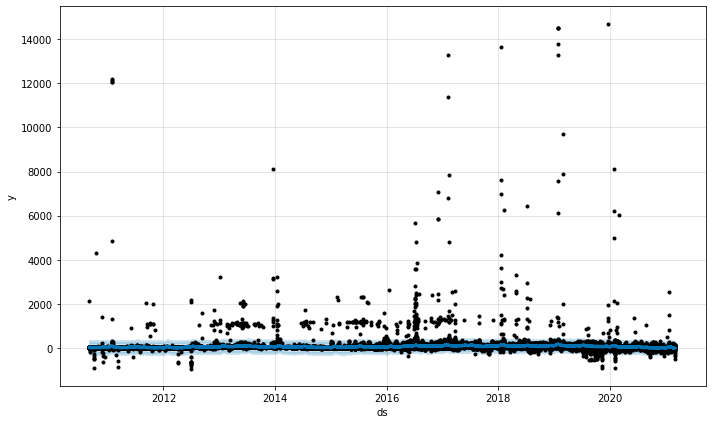

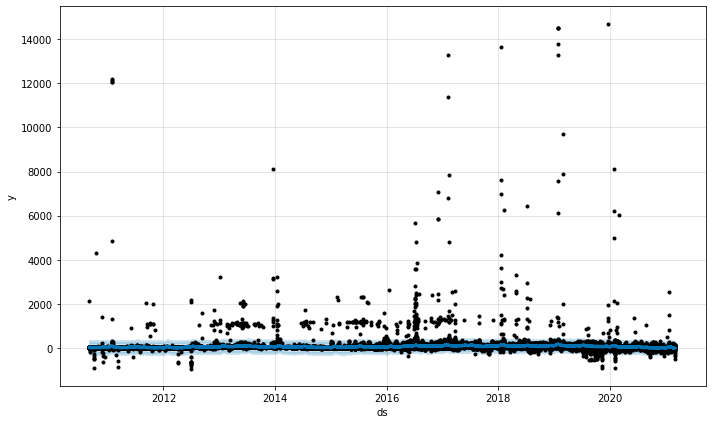

In [23]:
multipredicts.plot(new_timeframe)

In [62]:
plt.show()

In [25]:
mape(d_train['ElecPrice'],new_timeframe[['yhat']])

KeyError: ignored